## Notes
1. Using Kserve endpoint does not work with YOLO library, since it uses https and YOLO only accept http and grpc for triton remote server
2. Although it's possible to use k8s svc for the triton pod, it will request authorization token for header.
3. if we deploy isvc into the normal namespace which doens't have any requestauthentication and authorizationpolicy, we can use YOLO library like below

In [2]:
from ultralytics import YOLO

In [3]:
# model = YOLO("http://license-plate-detector-engines-predictor-00001-private.geun-tak-roh-hp-57f69d47.svc.cluster.local/vehicle_detector",task='detect')
vehicle_detector = YOLO("http://license-plate-detector-engines-predictor-00001-private.default.svc.cluster.local/vehicle_detector",task='detect')
license_detector = YOLO("http://license-plate-detector-engines-predictor-00001-private.default.svc.cluster.local/license_detector",task='detect')

In [4]:
vehicle_results = vehicle_detector("./Samples/car_image.jpg",save=True)
license_results = license_detector("./Samples/car_image.jpg",save=True)

self._parsed_url : http://license-plate-detector-engines-predictor-00001-private.default.svc.cluster.local
self._base_uri : 
roh _get: /v2/models/vehicle_detector/config

image 1/1 /mnt/user/LPD/finetune/Samples/car_image.jpg: 640x640 3 cars, 14.9ms
Speed: 1.3ms preprocess, 14.9ms inference, 5.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict7


NotImplementedError: WARNING ⚠️ 'YOLO' model does not support 'predict' mode for 'None' task yet.

In [4]:
import cv2 as cv
import matplotlib.pyplot as plt

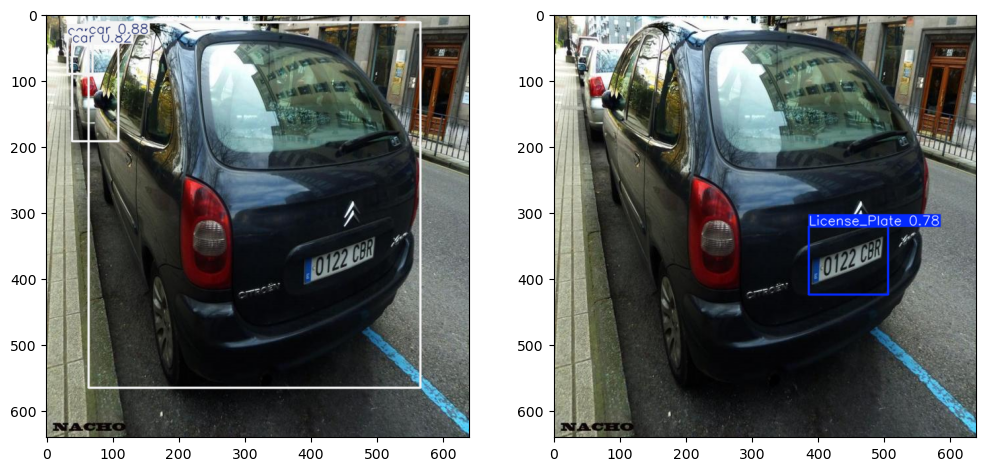

In [11]:
# cv.cvtColor(results[0].plot(), cv2.COLOR_BGR2RGB)
vehicle_rgb_img = cv.cvtColor(vehicle_results[0].plot(), cv.COLOR_BGR2RGB)
license_rgb_img = cv.cvtColor(license_results[0].plot(), cv.COLOR_BGR2RGB)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(vehicle_rgb_img)
axes[1].imshow(license_rgb_img)
# plt.tight_layout()
plt.show()

In [6]:
!diff /opt/conda/lib/python3.11/site-packages/ultralytics/utils/triton.py /opt/conda/lib/python3.11/site-packages/ultralytics/utils/triton.py_org

67,69c67
<             with open('/etc/secrets/ezua/.auth_token','r') as file:
<               AUTH_TOKEN = file.read().strip()
<             self.headers = {"Authorization": "Bearer " + AUTH_TOKEN}
---
> 
71c69
<             config = self.triton_client.get_model_config(endpoint,headers=self.headers)
---
>             config = self.triton_client.get_model_config(endpoint)
117c115
<         outputs = self.triton_client.infer(model_name=self.endpoint, inputs=infer_inputs, outputs=infer_outputs,headers=self.headers)
---
>         outputs = self.triton_client.infer(model_name=self.endpoint, inputs=infer_inputs, outputs=infer_outputs)
